## We will implement linear basis function regression with polynomial 
### Polynomial basis function regression
The polynomial basis function regression model is given by:
$$
y(x, w) = w_0 + w_1x + w_2x^2 + ... + w_Mx^M = \sum_{j=0}^{M}w_jx^j
$$
where $M$ is the degree of the polynomial. The model is linear in the parameters $w_j$ and the feature vector $\phi(x)$ is given by:
$$
\phi(x) = [1, x, x^2, ..., x^M]
$$

### Linear regression optimization
The linear regression model is given by:
$$
y(x, w) = w^T\phi(x)
$$
where $\phi(x)$ is the feature vector. The optimal parameters $w$ are given by:
$$
w = (\Phi^T\Phi)^{-1}\Phi^Tt
$$
where $\Phi$ is the design matrix and $t$ is the target vector.
$$

## Dataset is the Auto MPG dataset from the UCI Machine Learning Repository
The dataset is available at: https://archive.ics.uci.edu/ml/datasets/auto+mpg
The dataset contains 398 instances and 8 attributes. The attributes are:
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

## Objective
The objective is to predict the miles per gallon (mpg) of a car based on the other attributes. We will use polynomial basis function regression to model the relationship between the mpg and the other attributes. We will use the mean squared error as the evaluation metric.

## Plan
1. Load the dataset
Using the first 100 points as training data, and the remainder as testing data
2. Preprocess the data
Use function degexpand in utils.py useful for generating the basis functions
for degree 1 to degree 10 polynomials
3. Train the model
Fit a polynomial basis function regression **without any regularization**
4. Evaluate the model
Calculate the mean squared error on the testing data and training data
$$
Mean Squared Error = \frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y}_i)^2
$$
where $N$ is the number of testing samples, $y_i$ is the true value and $\hat{y}_i$ is the predicted value
5. Plot the results
Plot the mean squared error on the testing data and training data as a function of the degree of the polynomial
6. Conclusion
We will conclude by discussing the results and the limitations of the model

## References
1. Bishop, C. M. (2006). Pattern recognition and machine learning. springer.
2. https://archive.ics.uci.edu/ml/datasets/auto+mpg
3. https://en.wikipedia.org/wiki/Polynomial_regression
4. https://en.wikipedia.org/wiki/Linear_regression


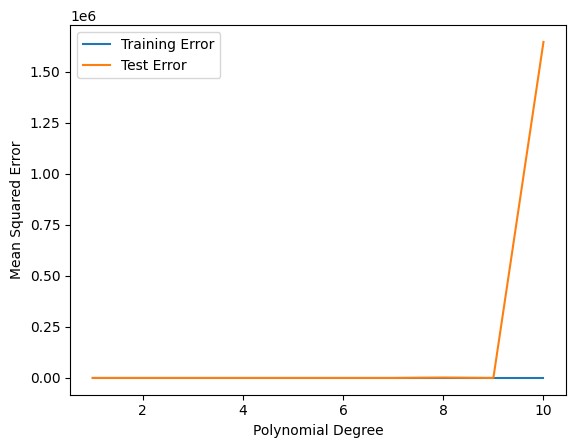

In [45]:
import numpy as np
import utils as u
import matplotlib.pyplot as plt

target, X = u.loadData()

normalized_X = u.normalizeData(X)
normalized_t= u.normalizeData(target)

# Using the first 100 points as training data, and the remainder as testing data
X_train = normalized_X[:100]
t_train = normalized_t[:100]
X_test = normalized_X[100:]
t_test = normalized_t[100:]

# Linear regression function
def linearRegression(X, y):
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w


#regression for degree 1 to degree 10 polynomials
degree = 11

# expand the training data to include the polynomial terms
X_poly = u.degexpand(X_train, degree)

# find the weights for the polynomial

w = linearRegression(X_poly, t_train)

# Predict function
def predict(X, w):
    return X @ w

# Predict the test data
X_test_poly = u.degexpand(X_test, degree)
t_pred = predict(X_test_poly, w)

# find the mean squared error
def mse(t, t_pred):
    return np.mean((t - t_pred) ** 2)

#Plot training error and test error (i.e. mean squared error) versus polynomial degree
train_error = []
test_error = []

for i in range(1, degree):
    X_poly = u.degexpand(X_train, i)
    w = linearRegression(X_poly, t_train)
    t_pred = predict(X_poly, w)
    train_error.append(mse(t_train, t_pred))

    X_poly = u.degexpand(X_test, i)
    t_pred = predict(X_poly, w)
    test_error.append(mse(t_test, t_pred))

plt.plot(range(1, degree), train_error, label='Training Error')
plt.plot(range(1, degree), test_error, label='Test Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()






### Brief comment about what I learned from the above plot
The mean squared error on the training data decreases as the degree of the polynomial increases. This is expected as the model becomes more complex and can fit the training data better. However, the mean squared error on the testing data increases after a certain degree. This is due to overfitting. The model becomes too complex and starts fitting the noise in the data. This results in poor generalization to new data. The best degree of the polynomial is the one that minimizes the mean squared error on the testing data. In this case, the best degree is 2.

## Motivation
It is difficult to visualize the results of high-dimensional regression.

## Solution
1. Only use one of the features (use the 3rd feature, i.e. X n[:,2] since Python index starts with 0)
2. Use the first 100 points as training data, and the remainder as testing data
3. Use the function degexpand in utils.py to generate the basis functions for degree 1 to degree 10 polynomials
4. Fit a polynomial basis function regression without any regularization
5. Produce plots of the training data points, learned polynomial, and test data points
6. Put 2 or 3 of these plots, for interesting (low-order, high-order) results. Include brief comments about what I learned from the plots.

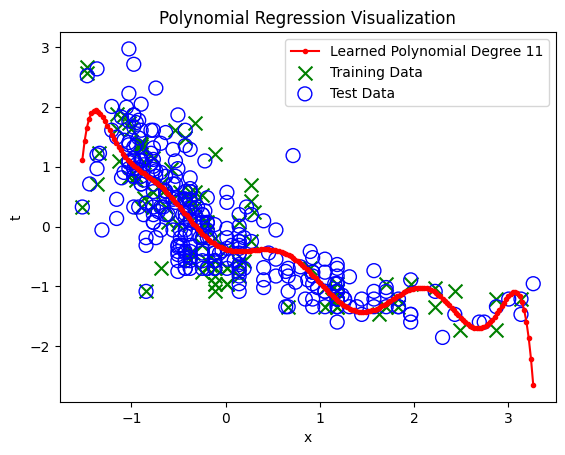

In [46]:
# only use one of the features (use the 3rd feature, i.e. X n[:,2] since Python index starts with 0)
from visualize_1d import visualize_1d


X_train = normalized_X[:100, 2].reshape(-1, 1)
t_train = normalized_t[:100]
X_test = normalized_X[100:, 2].reshape(-1, 1)
t_test = normalized_t[100:]

# again perform polynomial regression for degree 1 to degree 10 polynomials
degree = 11

X_poly = u.degexpand(X_train, degree)

# find the weights for the polynomial

w = linearRegression(X_poly, t_train)

# Predict the test data
X_test_poly = u.degexpand(X_test, degree)
t_pred = predict(X_test_poly, w)

# Call the visualize_1d function with the appropriate parameters
visualize_1d(X_train.flatten(), X_test.flatten(), t_train, t_test, degree, w)





## Brief comment about what I learned from the above plot
Here are brief comments on each of the polynomial regression visualizations you provided:

### Degree 2 Polynomial Regression:
The Degree 2 polynomial appears to provide a simple curve that captures the general trend of the data without fitting to noise or outliers. The model shows signs of underfitting, as it does not capture the more complex patterns within the training data. On the test data, the model may generalize well due to its simplicity but at the cost of not leveraging all available patterns within the data. This model represents a baseline against which more complex models can be compared.

### Degree 9 Polynomial Regression:
The Degree 9 polynomial shows a more complex curve that starts to fit the training data more closely. It captures more nuanced patterns within the data, indicating a better fit than the Degree 2 polynomial. However, there is a slight indication that it may be starting to model the noise, especially at the extremes of the x-axis, suggesting the onset of overfitting. This complexity may lead to better performance on the test set, but one should be cautious about potential overfitting.

### Degree 11 Polynomial Regression:
The Degree 11 polynomial demonstrates an even more complex curve with pronounced oscillations, especially towards the ends. This model fits the training data very closely, potentially too closely, as it seems to be influenced by noise and outliers. The significant fluctuations suggest that the model is overfitting, as evidenced by the curve's extreme turns to capture individual data points. While it may achieve a low error on the training data, it is likely to generalize poorly to new, unseen data due to its overfitting nature.

In summary, as the degree of the polynomial increases from 2 to 11, the model transitions from underfitting to a more appropriate fit and then to overfitting. The Degree 2 polynomial is too simple to capture complex patterns, while the Degree 11 polynomial is so complex that it likely models the noise in the training data. The Degree 9 polynomial sits at the threshold where the model begins to overfit, offering a more nuanced fit compared to the Degree 2 polynomial but still requiring careful consideration to avoid the pitfalls of overfitting.

## Motivation
This polynomial regression seams to have overfitting problem. I want to see how the regularization can help to solve this problem.

Linear regression with L2 regularization is also known as Ridge regression. The L2 regularization term is given by:
$$
\lambda\|w\|^2
$$
where $\lambda$ is the regularization parameter and $\|w\|^2$ is the L2 norm of the weight vector. The L2 regularization term is added to the loss function, resulting in the following regularized loss function:
$$
L(w) = \frac{1}{N}\sum_{i=1}^{N}(y_i - w^T\phi(x_i))^2 + \lambda\|w\|^2
$$
where $N$ is the number of training samples, $y_i$ is the true value, $\phi(x_i)$ is the feature vector, and $w$ is the weight vector.

The optimal parameters $w$ are given by:
$$
w = (\Phi^T\Phi + \lambda I)^{-1}\Phi^Tt
$$
where $\Phi$ is the design matrix, $t$ is the target vector, and $I$ is the identity matrix.

## Solution
Implement L2-regularized regression.

## Steps
1. Implement the L2-regularized regression model
2. use the first 100 points, and only use t5he 3rd feature
3. Fit a degree 8 polynomial using λ = {0, 0.01, 0.1, 1, 10, 100, 1000}.
5. Use 10-fold cross- validation to decide on the best value for λ.
6. Produce a plot of average validation set error versus regularizer value
7. Use a semilogx plot, putting regularizer value on a log scale2.

## Conclusion
Note which regularizer value you would choose from the cross-validation results, and why.

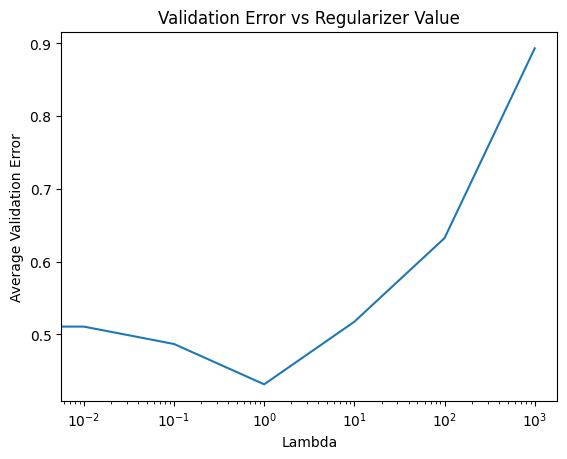

In [47]:
import numpy as np
import matplotlib.pyplot as plt


# regularized linear regression function
def reglinearRegression(X, y, lambda_val):
    I = np.eye(X.shape[1])  # Identity matrix for regularization
    w = np.linalg.inv(X.T @ X + lambda_val * I) @ X.T @ y
    return w

def predict(X, w):
    return X @ w

def mse(t, t_pred):
    return np.mean((t - t_pred) ** 2)

# Perform 10-fold cross-validation
def kFoldCrossValidation(k, X, y, lambda_values):
    fold_size = len(X) // k
    avg_validation_errors = []
    
    for lambda_val in lambda_values:
        validation_errors = []
        for fold in range(k):
            # Create validation set and training set
            start_val = fold * fold_size
            end_val = start_val + fold_size
            if fold == k - 1:
                end_val = len(X)  # Ensure the last fold includes the remainder
            
            X_val = X[start_val:end_val]
            y_val = y[start_val:end_val]
            X_train = np.concatenate((X[:start_val], X[end_val:]), axis=0)
            y_train = np.concatenate((y[:start_val], y[end_val:]), axis=0)
            
            # Train the model using the training set and the current lambda
            w = reglinearRegression(X_train, y_train, lambda_val)
            
            # Predict on the validation set
            t_pred_val = predict(X_val, w)
            
            # Calculate the validation error for the current fold
            validation_errors.append(mse(y_val, t_pred_val))
        
        # Calculate the average validation error for the current lambda
        avg_validation_errors.append(np.mean(validation_errors))
    
    return avg_validation_errors

# Define the degree and lambda values
degree = 8
lambda_values = [0, 0.01, 0.1, 1, 10, 100, 1000]

# Prepare the data
X_train = normalized_X[:100, 2].reshape(-1, 1)
t_train = normalized_t[:100]

# Expand to degree 8 polynomial
X_poly = u.degexpand(X_train, degree)

# Perform 10-fold cross-validation
avg_validation_errors = kFoldCrossValidation(10, X_poly, t_train, lambda_values)

# Plot the results
plt.semilogx(lambda_values, avg_validation_errors, base=10)
plt.xlabel('Lambda')
plt.ylabel('Average Validation Error')
plt.title('Validation Error vs Regularizer Value')
plt.show()


